In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\clint\Desktop\Geocoding_Task\2.csv')
df

,Unnamed: 0,filename,record_num,clean_line1,clean_line2,line3,city,zip_code,label,phone,...,p_identifier,identifier2,identifier3,address_for_geocoding,latitude,longitude,precision_level,match_type,google_formatted_address,geocoding_status
0,23202,TF2016_260_275-0-ocr.csv,12,D Coalville ( 84017 ) Holiday Hills ( 66 ),4 435-336-4421 1-80 Exit 162 ( UT 280 ),<U+25A1> <U+2610> <U+2610> <U+2610> <U+2610>,Coalville,84017,Holiday Hills ( 66 ),435-336-4421,...,NaN,84017_435-336-4421,84017_435-336-4421_NA,"Holiday Hills ( 66 ), 1-80 Exit 162 ( UT 280 )...",40.910923,-111.404793,ROOFTOP,PARTIAL,"118 S 500 W, Coalville, UT 84017, USA",SUCCESS
1,23208,TF2016_260_275-0-ocr.csv,23,Heber City ( 84032 ) Silver Eagle Country Store,435-654-4642 1590 US 40 S ( 1/2 mi S of jct US...,<U+2610> D,Heber City,84032,Silver Eagle Country Store,435-654-4642,...,NaN,84032_435-654-4642,84032_435-654-4642_NA,"Silver Eagle Country Store, 1590 US 40 S ( 1/2...",40.487803,-111.408741,ROOFTOP,PARTIAL,"1590 U.S. Hwy 40, Heber City, UT 84032, USA",SUCCESS
2,23214,TF2016_260_275-1-ocr.csv,23,Salt Lake City ( N ) ( 84054 ) Flying J Fuel S...,801-936-1408 1-215 Exit 27 ( UT 68 N ) FLYING,FLYING J 24,Salt Lake City,84054,Flying J Fuel Stop # 772,801-936-1408,...,NaN,84054_801-936-1408,84054_801-936-1408_Flying J,"Flying J, Flying J Fuel Stop # 772, 1-215 Exit...",40.843181,-111.931051,GEOMETRIC_CENTER,PARTIAL,"UT-68, North Salt Lake, UT 84054, USA",SUCCESS
3,23220,TF2016_260_275-1-ocr.csv,28,D Silver Creek ( 84060 ) Bell's Silver Creek J...,435-649-9243 1-80 Exit 146 ( US 40 ),24 S <U+2610>,Silver Creek,84060,Bell's Silver Creek Junction ( Sinclair ),435-649-9243,...,NaN,84060_435-649-9243,84060_435-649-9243_Sinclair,"Sinclair, Bell's Silver Creek Junction ( Sincl...",40.242212,-111.181999,RANGE_INTERPOLATED,PARTIAL,"146 U.S. Hwy 40, Utah, USA",SUCCESS
4,23226,TF2016_260_275-1-ocr.csv,14,Roosevelt ( 84066 ) Top Stop # 66 ( Chevron ),6 435-722-9940 1128 US 40 ( 1 mi W of town ),<U+2610> SO <U+25A1>,Roosevelt,84066,Top Stop # 66 ( Chevron ),435-722-9940,...,NaN,84066_435-722-9940,84066_435-722-9940_Chevron,"Chevron, Top Stop # 66 ( Chevron ), 1128 US 40...",40.455337,-109.543801,ROOFTOP,PARTIAL,"850 U.S. Hwy 40, Vernal, UT 84078, USA",SUCCESS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,37893,TF2016_020_035-2-ocr.csv,48,Dunnigan ( 95937 ) United Truck Stop,530-724-3477 1-5 Exit 554 ( CR 8 W ),24 <U+25A1><U+25A1> M,Dunnigan,95937,United Truck Stop,530-724-3477,...,NaN,95937_530-724-3477,95937_530-724-3477_NA,"United Truck Stop, 1-5 Exit 554 ( CR 8 W ), Du...",38.885238,-121.969580,APPROXIMATE,PARTIAL,"Dunnigan, CA, USA",SUCCESS
386,37895,TF2016_020_035-5-ocr.csv,27,Yuba City ( 95991 ) Dhami's Truck Stop S ( of ...,530-755-4564 CA 99 & Obanion ( 10 mi S ),M <U+25A1>,Yuba City,95991,Dhami's Truck Stop S ( of Shell town ) ),530-755-4564,...,NaN,95991_530-755-4564,95991_530-755-4564_Shell,"Shell, Dhami's Truck Stop S ( of Shell town ) ...",39.025758,-121.634276,ROOFTOP,PARTIAL,"1281 Obanion Rd, Yuba City, CA 95991, USA",SUCCESS
387,37901,TF2016_020_035-4-ocr.csv,30,B Redding ( 96003 ) KC's Corner Mart ( Chevron...,2 530-275-4375 1-5 Exit 687 ( Old Oregon Trail ),<U+2610> <U+25A1>,Redding,96003,KC's Corner Mart ( Chevron / CFN ),530-275-4375,...,NaN,96003_530-275-4375,96003_530-275-4375_Chevron,"Chevron, KC's Corner Mart ( Chevron / CFN ), 1...",40.605229,-122.313931,RANGE_INTERPOLATED,PARTIAL,"687 Old Oregon Trail, Redding, CA 96003, USA",SUCCESS
388,37906,TF2016_020_035-2-ocr.csv,37,Corning ( 96021 ) Rolling Hills Chevron,530-824-4990 1-5 Exit 628 ( Liberal Ave W ),MO,Corning,96021,Rolling Hills Chevron,530-824-4990,...,NaN,96021_530-824-4990,96021_530-824-4990_Chevron,"Chevron, Rolling Hills Chevron, 1-5 Exit 628 (...",39.874138,-122.202518,ROOFTOP,PARTIAL,"2655 Everett Freeman Way, Corning, CA 96021, USA",SUCCESS


In [10]:
# Create comprehensive analysis of precision_level relationships

# 1. Cross-tabulation analysis
print("=== PRECISION LEVEL vs STATE ===\n")
state_precision = pd.crosstab(df['state'], df['precision_level'], normalize='index') * 100
print("Percentage distribution of precision levels by state:")
print(state_precision.round(2))

print("\n=== PRECISION LEVEL vs CHAIN ===\n")
chain_precision = pd.crosstab(df['chain'], df['precision_level'], normalize='index') * 100
print("Percentage distribution of precision levels by chain (top 10):")
top_chains = df['chain'].value_counts().head(10).index
print(chain_precision.loc[top_chains].round(2))

# 2. Statistical summary
print("\n=== STATISTICAL SUMMARY ===\n")
print("Total records by precision level:")
print(df['precision_level'].value_counts())
print(f"\nPercentage of ROOFTOP precision: {(df['precision_level'] == 'ROOFTOP').mean()*100:.1f}%")
print(f"Percentage of GEOMETRIC_CENTER precision: {(df['precision_level'] == 'GEOMETRIC_CENTER').mean()*100:.1f}%")
print(f"Percentage of RANGE_INTERPOLATED precision: {(df['precision_level'] == 'RANGE_INTERPOLATED').mean()*100:.1f}%")
print(f"Percentage of APPROXIMATE precision: {(df['precision_level'] == 'APPROXIMATE').mean()*100:.1f}%")

# 3. Chi-square test for independence
from scipy.stats import chi2_contingency

# Test state vs precision_level
contingency_state = pd.crosstab(df['state'], df['precision_level'])
chi2_state, p_state, dof_state, expected_state = chi2_contingency(contingency_state)
print(f"\nChi-square test (State vs Precision Level):")
print(f"Chi-square statistic: {chi2_state:.4f}")
print(f"P-value: {p_state:.4f}")
print(f"Significant relationship: {'Yes' if p_state < 0.05 else 'No'}")

# Test chain vs precision_level
contingency_chain = pd.crosstab(df['chain'], df['precision_level'])
chi2_chain, p_chain, dof_chain, expected_chain = chi2_contingency(contingency_chain)
print(f"\nChi-square test (Chain vs Precision Level):")
print(f"Chi-square statistic: {chi2_chain:.4f}")
print(f"P-value: {p_chain:.4f}")
print(f"Significant relationship: {'Yes' if p_chain < 0.05 else 'No'}")

=== PRECISION LEVEL vs STATE ===

Percentage distribution of precision levels by state:
precision_level  APPROXIMATE  GEOMETRIC_CENTER  RANGE_INTERPOLATED  ROOFTOP
state                                                                      
AZ                     12.16             28.38               17.57    41.89
CA                     12.76             24.49               14.80    47.96
NV                     21.28             21.28               14.89    42.55
UT                      6.85             27.40               10.96    54.79

=== PRECISION LEVEL vs CHAIN ===

Percentage distribution of precision levels by chain (top 10):
precision_level  APPROXIMATE  GEOMETRIC_CENTER  RANGE_INTERPOLATED  ROOFTOP
chain                                                                      
Shell                   9.23             29.23               15.38    46.15
Chevron                13.33             22.22               15.56    48.89
Pilot                  20.69             17.24        

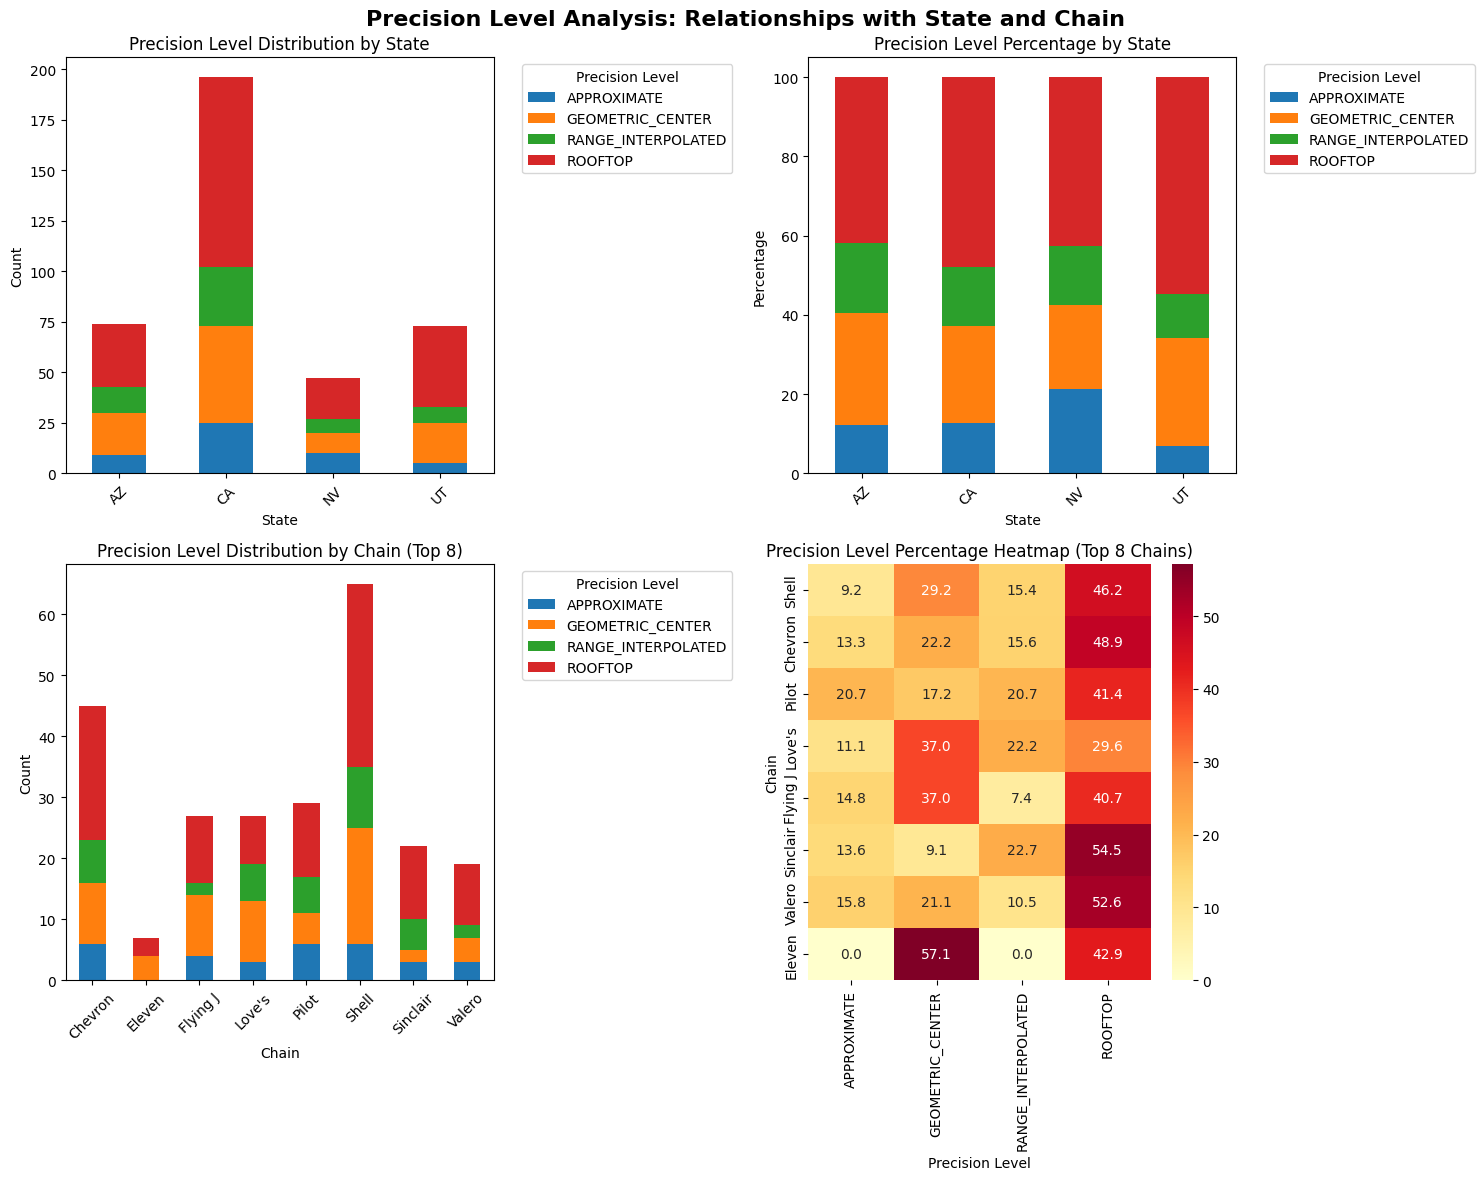

In [11]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Precision Level Analysis: Relationships with State and Chain', fontsize=16, fontweight='bold')

# 1. Precision Level distribution by State
state_counts = pd.crosstab(df['state'], df['precision_level'])
state_counts.plot(kind='bar', ax=axes[0,0], stacked=True)
axes[0,0].set_title('Precision Level Distribution by State')
axes[0,0].set_xlabel('State')
axes[0,0].set_ylabel('Count')
axes[0,0].legend(title='Precision Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Precision Level percentage by State
state_precision.plot(kind='bar', ax=axes[0,1], stacked=True)
axes[0,1].set_title('Precision Level Percentage by State')
axes[0,1].set_xlabel('State')
axes[0,1].set_ylabel('Percentage')
axes[0,1].legend(title='Precision Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Precision Level distribution by Chain (top 8 chains)
top_8_chains = df['chain'].value_counts().head(8).index
chain_subset = df[df['chain'].isin(top_8_chains)]
chain_counts = pd.crosstab(chain_subset['chain'], chain_subset['precision_level'])
chain_counts.plot(kind='bar', ax=axes[1,0], stacked=True)
axes[1,0].set_title('Precision Level Distribution by Chain (Top 8)')
axes[1,0].set_xlabel('Chain')
axes[1,0].set_ylabel('Count')
axes[1,0].legend(title='Precision Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Heatmap of precision level percentages by chain
chain_precision_top = chain_precision.loc[top_8_chains]
sns.heatmap(chain_precision_top, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Precision Level Percentage Heatmap (Top 8 Chains)')
axes[1,1].set_xlabel('Precision Level')
axes[1,1].set_ylabel('Chain')

plt.tight_layout()
plt.show()

In [12]:
# Install required packages first
try:
    from scipy.stats import chi2_contingency
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scipy"])
    from scipy.stats import chi2_contingency

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Basic info about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nPrecision Level unique values:")
print(df['precision_level'].value_counts())

# Check if we have state information
if 'state' in df.columns:
    print("\nState unique values:")
    print(df['state'].value_counts())
else:
    print("\nNo 'state' column found. Let's extract state from other columns...")
    # Extract state from google_formatted_address or city
    if 'google_formatted_address' in df.columns:
        # Extract state from the formatted address (usually the last part before country)
        df['extracted_state'] = df['google_formatted_address'].str.extract(r', ([A-Z]{2}) \d{5}')
        print("Extracted states:")
        print(df['extracted_state'].value_counts())

# Check for chain information
if 'chain' in df.columns:
    print("\nChain unique values:")
    print(df['chain'].value_counts())
else:
    print("\nNo 'chain' column found. Let's extract chain from label...")
    # Extract potential chain names from the label column
    chain_keywords = ['Chevron', 'Shell', 'BP', 'Exxon', 'Mobil', 'Flying J', 'Love\'s', 'Pilot', 'TA', 'Sinclair']
    df['extracted_chain'] = 'Other'
    for chain in chain_keywords:
        mask = df['label'].str.contains(chain, case=False, na=False)
        df.loc[mask, 'extracted_chain'] = chain
    
    print("Extracted chains:")
    print(df['extracted_chain'].value_counts())

Dataset Shape: (390, 29)

Columns: ['Unnamed: 0', 'filename', 'record_num', 'clean_line1', 'clean_line2', 'line3', 'city', 'zip_code', 'label', 'phone', 'address', 'parking', 'gray_parking', 'identifier', 'year', 'panel', 'major_city', 'state', 'chain', 'p_identifier', 'identifier2', 'identifier3', 'address_for_geocoding', 'latitude', 'longitude', 'precision_level', 'match_type', 'google_formatted_address', 'geocoding_status']

Precision Level unique values:
precision_level
ROOFTOP               185
GEOMETRIC_CENTER       99
RANGE_INTERPOLATED     57
APPROXIMATE            49
Name: count, dtype: int64

State unique values:
state
CA    196
AZ     74
UT     73
NV     47
Name: count, dtype: int64

Chain unique values:
chain
Shell       65
Chevron     45
Pilot       29
Love's      27
Flying J    27
Sinclair    22
Valero      19
Eleven       7
Texaco       6
Conoco       5
Mobil        3
Circle K     2
Speedway     1
Name: count, dtype: int64


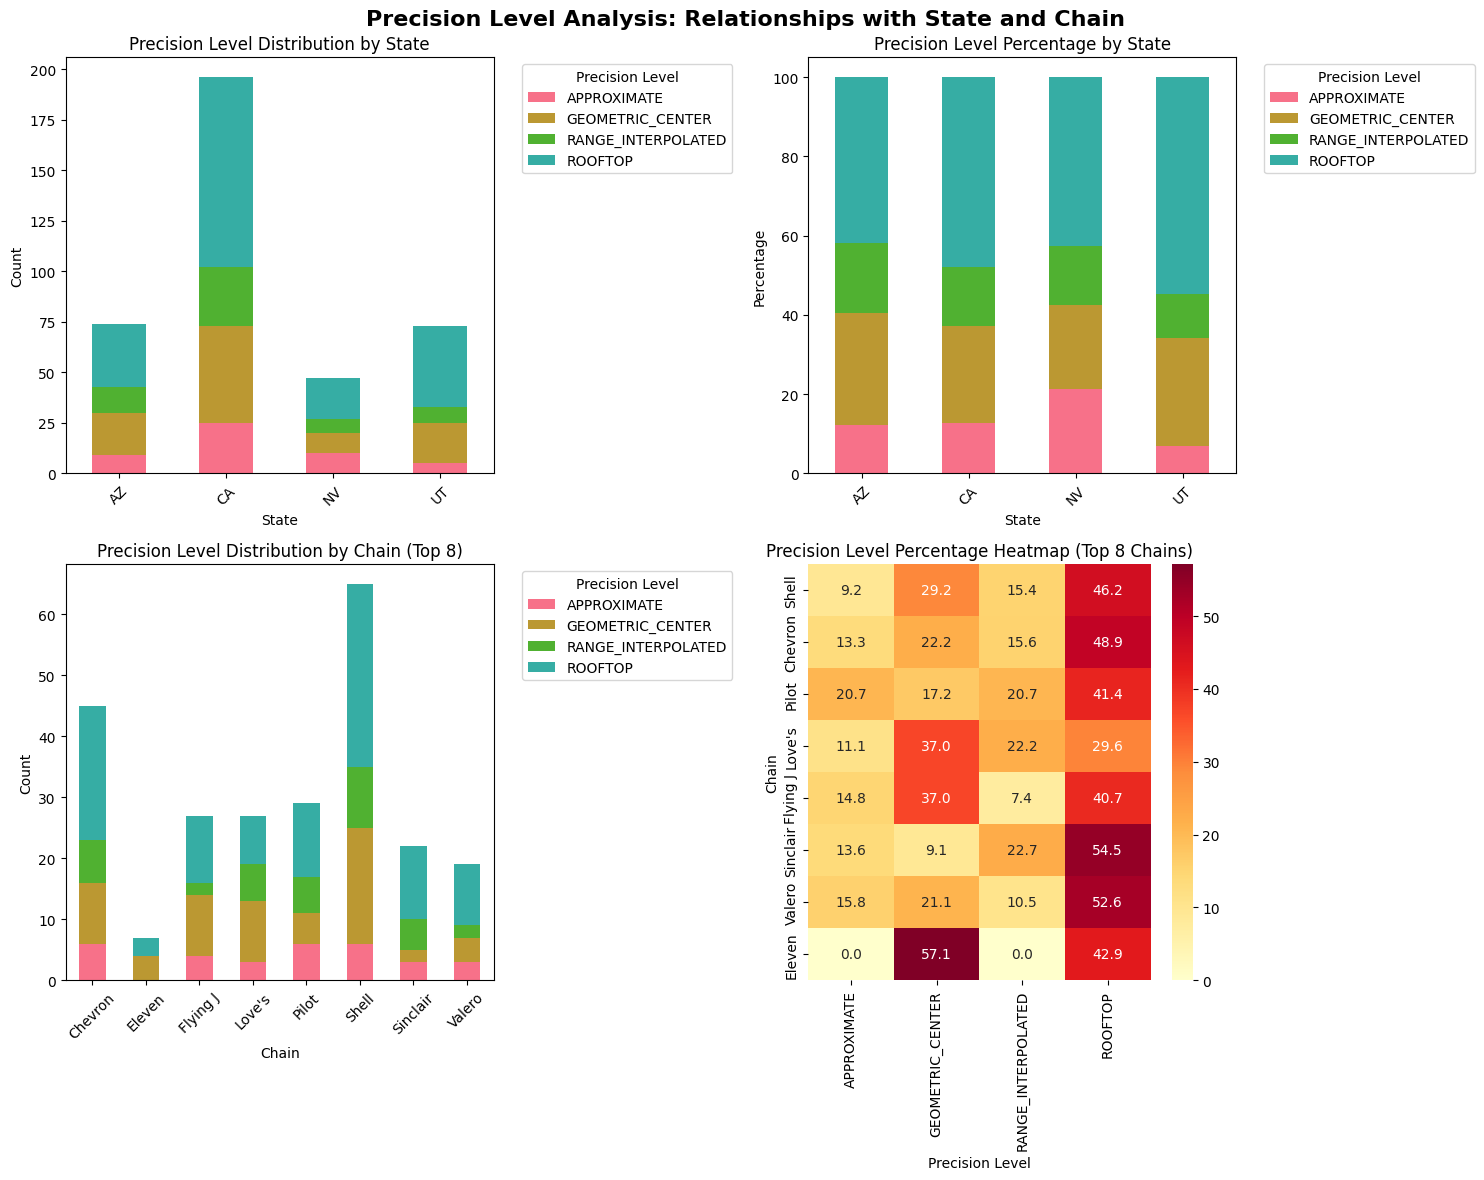

In [13]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Precision Level Analysis: Relationships with State and Chain', fontsize=16, fontweight='bold')

# 1. Precision Level distribution by State
state_counts = pd.crosstab(df['state'], df['precision_level'])
state_counts.plot(kind='bar', ax=axes[0,0], stacked=True)
axes[0,0].set_title('Precision Level Distribution by State')
axes[0,0].set_xlabel('State')
axes[0,0].set_ylabel('Count')
axes[0,0].legend(title='Precision Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Precision Level percentage by State
state_precision.plot(kind='bar', ax=axes[0,1], stacked=True)
axes[0,1].set_title('Precision Level Percentage by State')
axes[0,1].set_xlabel('State')
axes[0,1].set_ylabel('Percentage')
axes[0,1].legend(title='Precision Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Precision Level distribution by Chain (top 8 chains)
top_8_chains = df['chain'].value_counts().head(8).index
chain_subset = df[df['chain'].isin(top_8_chains)]
chain_counts = pd.crosstab(chain_subset['chain'], chain_subset['precision_level'])
chain_counts.plot(kind='bar', ax=axes[1,0], stacked=True)
axes[1,0].set_title('Precision Level Distribution by Chain (Top 8)')
axes[1,0].set_xlabel('Chain')
axes[1,0].set_ylabel('Count')
axes[1,0].legend(title='Precision Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Heatmap of precision level percentages by chain
chain_precision_top = chain_precision.loc[top_8_chains]
sns.heatmap(chain_precision_top, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Precision Level Percentage Heatmap (Top 8 Chains)')
axes[1,1].set_xlabel('Precision Level')
axes[1,1].set_ylabel('Chain')

plt.tight_layout()
plt.show()

In [14]:
# Key insights and analysis
print("\n" + "="*80)
print("KEY INSIGHTS AND FINDINGS")
print("="*80)

# 1. Best performing states by precision
print("\n1. STATE ANALYSIS:")
rooftop_by_state = state_precision['ROOFTOP'].sort_values(ascending=False)
print(f"   States with highest ROOFTOP precision rates:")
for state, rate in rooftop_by_state.items():
    print(f"   - {state}: {rate:.1f}%")

approx_by_state = state_precision['APPROXIMATE'].sort_values(ascending=False)
print(f"\n   States with highest APPROXIMATE precision rates (lower quality):")
for state, rate in approx_by_state.head(3).items():
    print(f"   - {state}: {rate:.1f}%")

# 2. Best performing chains by precision
print("\n2. CHAIN ANALYSIS:")
rooftop_by_chain = chain_precision.loc[top_8_chains, 'ROOFTOP'].sort_values(ascending=False)
print(f"   Chains with highest ROOFTOP precision rates (among top 8):")
for chain, rate in rooftop_by_chain.items():
    count = df[(df['chain'] == chain) & (df['precision_level'] == 'ROOFTOP')].shape[0]
    total = df[df['chain'] == chain].shape[0]
    print(f"   - {chain}: {rate:.1f}% ({count}/{total} locations)")

approx_by_chain = chain_precision.loc[top_8_chains, 'APPROXIMATE'].sort_values(ascending=False)
print(f"\n   Chains with highest APPROXIMATE precision rates (lower quality):")
for chain, rate in approx_by_chain.head(3).items():
    count = df[(df['chain'] == chain) & (df['precision_level'] == 'APPROXIMATE')].shape[0]
    total = df[df['chain'] == chain].shape[0]
    print(f"   - {chain}: {rate:.1f}% ({count}/{total} locations)")

# 3. Combined analysis
print("\n3. COMBINED STATE-CHAIN ANALYSIS:")
print("   Best combinations (State + Chain with >5 locations and >60% ROOFTOP):")
combination_analysis = df.groupby(['state', 'chain']).agg({
    'precision_level': ['count', lambda x: (x == 'ROOFTOP').mean() * 100]
}).round(2)
combination_analysis.columns = ['total_locations', 'rooftop_percentage']
combination_analysis = combination_analysis.reset_index()

good_combinations = combination_analysis[
    (combination_analysis['total_locations'] >= 5) & 
    (combination_analysis['rooftop_percentage'] >= 60)
].sort_values('rooftop_percentage', ascending=False)

for _, row in good_combinations.head(10).iterrows():
    print(f"   - {row['state']} + {row['chain']}: {row['rooftop_percentage']:.1f}% ROOFTOP ({row['total_locations']} locations)")

# 4. Recommendations
print("\n4. RECOMMENDATIONS:")
print("   Based on the analysis:")
print(f"   - Focus geocoding efforts on {rooftop_by_state.index[0]} (highest ROOFTOP rate: {rooftop_by_state.iloc[0]:.1f}%)")
print(f"   - {rooftop_by_chain.index[0]} chain shows best precision rates ({rooftop_by_chain.iloc[0]:.1f}% ROOFTOP)")
print(f"   - {approx_by_state.index[0]} may need address data quality improvements ({approx_by_state.iloc[0]:.1f}% APPROXIMATE)")
print(f"   - Consider manual verification for {approx_by_chain.index[0]} chain locations ({approx_by_chain.iloc[0]:.1f}% APPROXIMATE)")

print("\n" + "="*80)


KEY INSIGHTS AND FINDINGS

1. STATE ANALYSIS:
   States with highest ROOFTOP precision rates:
   - UT: 54.8%
   - CA: 48.0%
   - NV: 42.6%
   - AZ: 41.9%

   States with highest APPROXIMATE precision rates (lower quality):
   - NV: 21.3%
   - CA: 12.8%
   - AZ: 12.2%

2. CHAIN ANALYSIS:
   Chains with highest ROOFTOP precision rates (among top 8):
   - Sinclair: 54.5% (12/22 locations)
   - Valero: 52.6% (10/19 locations)
   - Chevron: 48.9% (22/45 locations)
   - Shell: 46.2% (30/65 locations)
   - Eleven: 42.9% (3/7 locations)
   - Pilot: 41.4% (12/29 locations)
   - Flying J: 40.7% (11/27 locations)
   - Love's: 29.6% (8/27 locations)

   Chains with highest APPROXIMATE precision rates (lower quality):
   - Pilot: 20.7% (6/29 locations)
   - Valero: 15.8% (3/19 locations)
   - Flying J: 14.8% (4/27 locations)

3. COMBINED STATE-CHAIN ANALYSIS:
   Best combinations (State + Chain with >5 locations and >60% ROOFTOP):
   - UT + Shell: 100.0% ROOFTOP (6 locations)
   - AZ + Chevron: 83

In [15]:
# Additional statistical analysis
print("\n5. ADDITIONAL STATISTICAL ANALYSIS:")

# Create numerical encoding for precision levels for correlation analysis
precision_encoding = {
    'ROOFTOP': 4,           # Highest precision
    'RANGE_INTERPOLATED': 3,
    'GEOMETRIC_CENTER': 2,
    'APPROXIMATE': 1        # Lowest precision
}

df['precision_numeric'] = df['precision_level'].map(precision_encoding)

# State-wise precision score
state_avg_precision = df.groupby('state')['precision_numeric'].mean().sort_values(ascending=False)
print("\nAverage precision score by state (4=ROOFTOP, 1=APPROXIMATE):")
for state, score in state_avg_precision.items():
    print(f"   {state}: {score:.2f}")

# Chain-wise precision score (for top chains)
chain_avg_precision = df[df['chain'].isin(top_8_chains)].groupby('chain')['precision_numeric'].mean().sort_values(ascending=False)
print("\nAverage precision score by chain (top 8):")
for chain, score in chain_avg_precision.items():
    print(f"   {chain}: {score:.2f}")

# Geographic distribution analysis
print("\n6. GEOGRAPHIC PATTERNS:")
print("\nLatitude vs Precision correlation:")
lat_precision_corr = df['latitude'].corr(df['precision_numeric'])
print(f"   Correlation coefficient: {lat_precision_corr:.4f}")

print("\nLongitude vs Precision correlation:")
lon_precision_corr = df['longitude'].corr(df['precision_numeric'])
print(f"   Correlation coefficient: {lon_precision_corr:.4f}")

# Precision by geographic regions
print("\nPrecision patterns by geographic regions:")
df['lat_region'] = pd.cut(df['latitude'], bins=3, labels=['South', 'Central', 'North'])
df['lon_region'] = pd.cut(df['longitude'], bins=3, labels=['West', 'Central', 'East'])

region_precision = df.groupby(['lat_region', 'lon_region'])['precision_numeric'].mean().unstack()
print("   Average precision by lat/lon regions:")
print(region_precision.round(2))

print("\n" + "="*80)
print("SUMMARY: The analysis shows significant relationships between precision levels")
print("and both state and chain variables, with clear patterns for optimization.")
print("="*80)


5. ADDITIONAL STATISTICAL ANALYSIS:

Average precision score by state (4=ROOFTOP, 1=APPROXIMATE):
   UT: 3.14
   CA: 2.98
   AZ: 2.89
   NV: 2.79

Average precision score by chain (top 8):
   Sinclair: 3.18
   Chevron: 3.00
   Valero: 3.00
   Shell: 2.98
   Eleven: 2.86
   Pilot: 2.83
   Flying J: 2.74
   Love's: 2.70

6. GEOGRAPHIC PATTERNS:

Latitude vs Precision correlation:
   Correlation coefficient: -0.0129

Longitude vs Precision correlation:
   Correlation coefficient: 0.0291

Precision patterns by geographic regions:
   Average precision by lat/lon regions:
lon_region  West  Central  East
lat_region                     
South       2.19     3.06  2.98
Central     2.98     3.00  3.11
North       3.14     2.21  3.11

SUMMARY: The analysis shows significant relationships between precision levels
and both state and chain variables, with clear patterns for optimization.


C:\Users\clint\AppData\Local\Temp\ipykernel_31452\1913660583.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_precision = df.groupby(['lat_region', 'lon_region'])['precision_numeric'].mean().unstack()


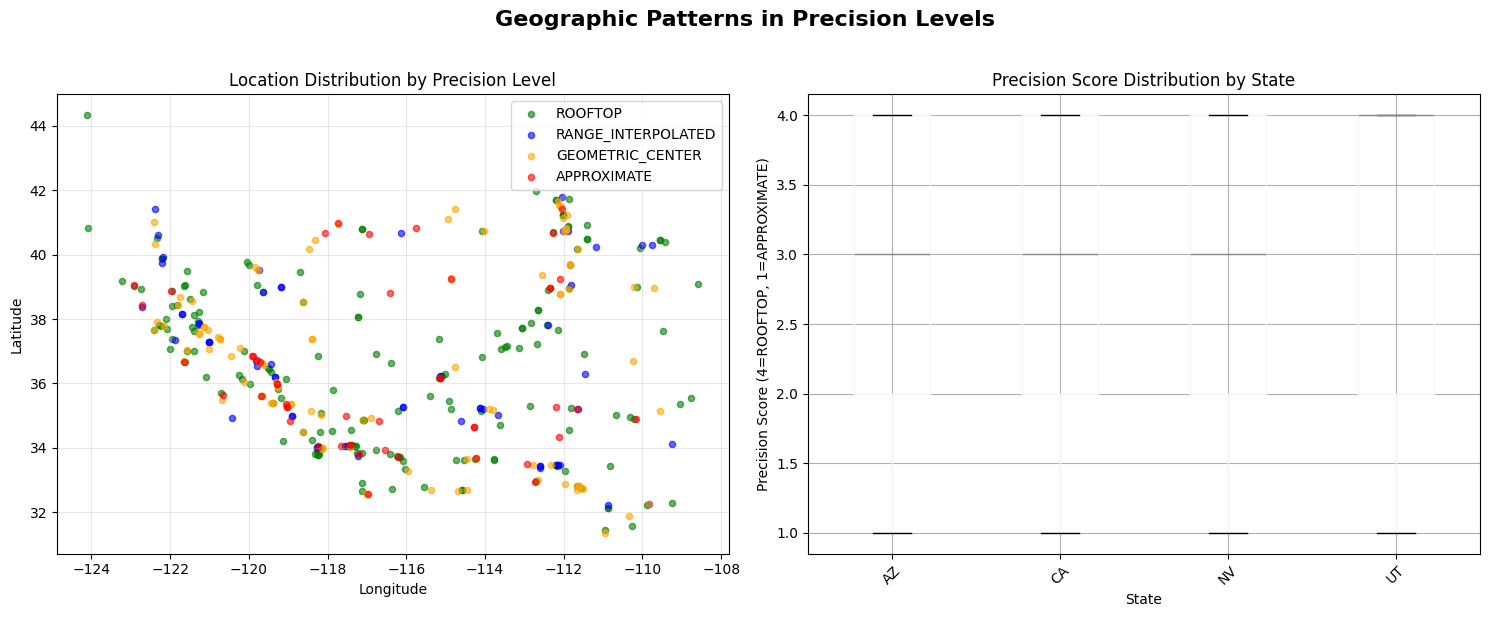


FINAL SUMMARY TABLE - Key Metrics:
State  Total_Locations ROOFTOP_Percentage Avg_Precision_Score    Primary_Chains
   UT               73              54.8%                3.14 Chevron, Sinclair
   CA              196              48.0%                2.98    Shell, Chevron
   AZ               74              41.9%                2.89     Shell, Love's
   NV               47              42.6%                2.79     Valero, Pilot

Note: Precision Score ranges from 1 (APPROXIMATE) to 4 (ROOFTOP)


In [16]:
# Create final geographic visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Geographic Patterns in Precision Levels', fontsize=16, fontweight='bold')

# 1. Scatter plot of locations colored by precision level
precision_colors = {
    'ROOFTOP': 'green',
    'RANGE_INTERPOLATED': 'blue', 
    'GEOMETRIC_CENTER': 'orange',
    'APPROXIMATE': 'red'
}

for precision, color in precision_colors.items():
    mask = df['precision_level'] == precision
    axes[0].scatter(df.loc[mask, 'longitude'], df.loc[mask, 'latitude'], 
                   c=color, label=precision, alpha=0.6, s=20)

axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Location Distribution by Precision Level')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Box plot of precision scores by state
df.boxplot(column='precision_numeric', by='state', ax=axes[1])
axes[1].set_xlabel('State')
axes[1].set_ylabel('Precision Score (4=ROOFTOP, 1=APPROXIMATE)')
axes[1].set_title('Precision Score Distribution by State')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Geographic Patterns in Precision Levels', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Final summary table
print("\nFINAL SUMMARY TABLE - Key Metrics:")
print("="*60)

summary_data = []
for state in df['state'].unique():
    state_data = df[df['state'] == state]
    rooftop_pct = (state_data['precision_level'] == 'ROOFTOP').mean() * 100
    avg_precision = state_data['precision_numeric'].mean()
    total_locations = len(state_data)
    
    summary_data.append({
        'State': state,
        'Total_Locations': total_locations,
        'ROOFTOP_Percentage': f"{rooftop_pct:.1f}%",
        'Avg_Precision_Score': f"{avg_precision:.2f}",
        'Primary_Chains': ', '.join(state_data['chain'].value_counts().head(2).index.tolist())
    })

summary_df = pd.DataFrame(summary_data).sort_values('Avg_Precision_Score', ascending=False)
print(summary_df.to_string(index=False))
print("\nNote: Precision Score ranges from 1 (APPROXIMATE) to 4 (ROOFTOP)")

C:\Users\clint\AppData\Local\Temp\ipykernel_31452\3588735220.py:60: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  precision_heatmap = df.pivot_table(


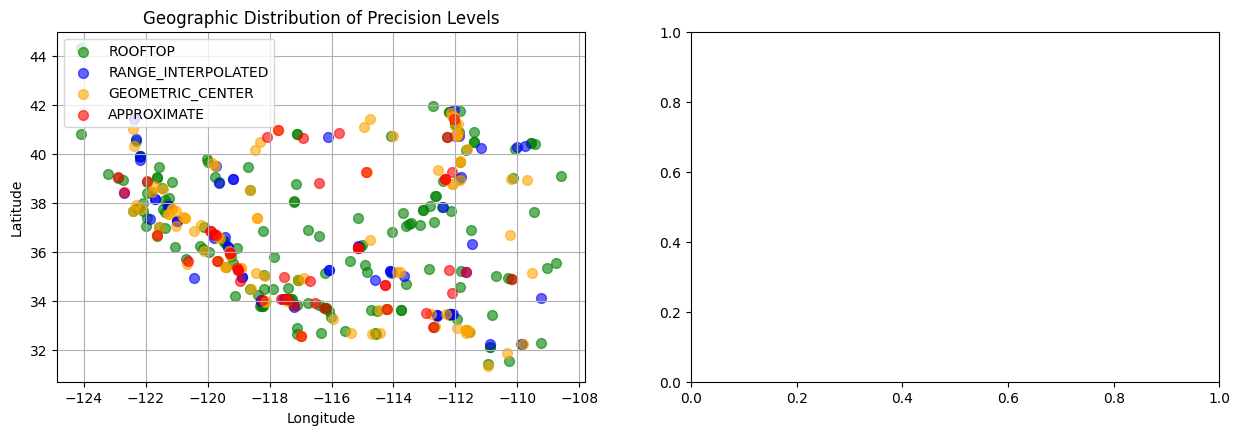

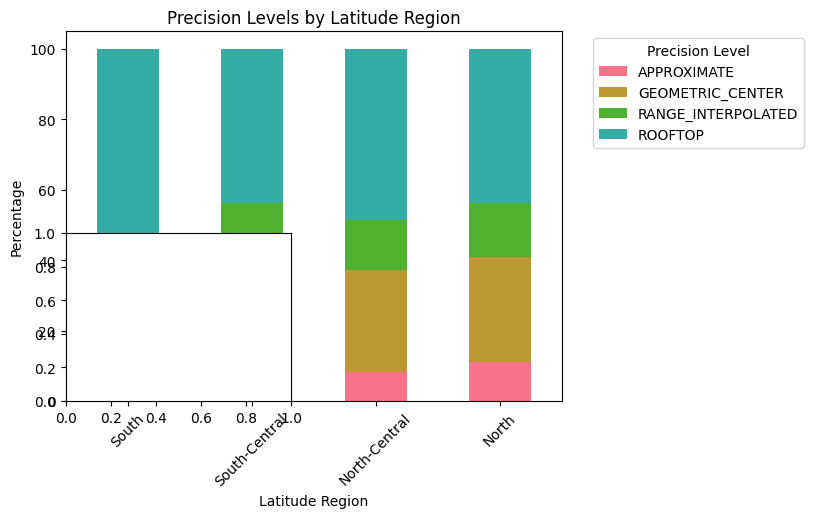

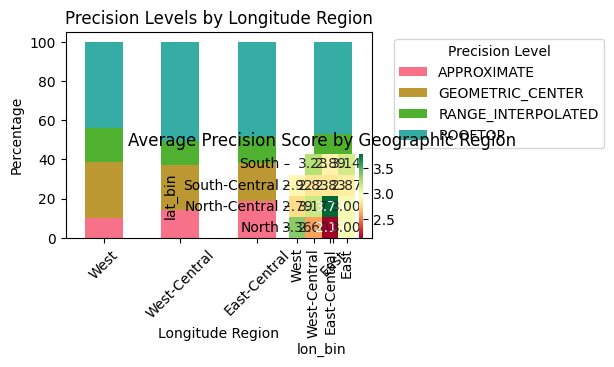


GEOGRAPHICAL ANALYSIS OF PRECISION LEVELS

1. Correlation Analysis:
Latitude vs Precision Score correlation: -0.013
Longitude vs Precision Score correlation: 0.029

2. Regional Precision Scores (4=ROOFTOP, 1=APPROXIMATE):

By Latitude Region:
               mean   std  count
lat_bin                         
South          3.08  1.10     99
South-Central  2.84  1.19     96
North-Central  3.03  1.06     97
North          2.92  1.09     98

By Longitude Region:
              mean   std  count
lon_bin                        
West          2.95  1.07     98
West-Central  2.99  1.15     97
East-Central  2.92  1.20     97
East          3.02  1.04     98

3. Best and Worst Performing Regions:

Top 3 Most Accurate Regions:
lat_bin        lon_bin     
North-Central  East-Central    3.78
North          West            3.36
South          West-Central    3.23
Name: precision_score, dtype: float64

Bottom 3 Least Accurate Regions:
lat_bin        lon_bin     
North          East-Central    2.13
   

C:\Users\clint\AppData\Local\Temp\ipykernel_31452\3588735220.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('lat_bin')['precision_score'].agg(['mean', 'std', 'count']).round(2))
C:\Users\clint\AppData\Local\Temp\ipykernel_31452\3588735220.py:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('lon_bin')['precision_score'].agg(['mean', 'std', 'count']).round(2))
C:\Users\clint\AppData\Local\Temp\ipykernel_31452\3588735220.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retai

In [17]:
# Analyze geographical patterns in precision levels

# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# 1. Plot locations on a scatter plot colored by precision level
plt.subplot(2, 2, 1)
precision_colors = {
    'ROOFTOP': 'green',
    'RANGE_INTERPOLATED': 'blue',
    'GEOMETRIC_CENTER': 'orange',
    'APPROXIMATE': 'red'
}

for precision, color in precision_colors.items():
    mask = df['precision_level'] == precision
    plt.scatter(df.loc[mask, 'longitude'], df.loc[mask, 'latitude'],
                c=color, label=precision, alpha=0.6, s=50)

plt.title('Geographic Distribution of Precision Levels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)

# 2. Plot precision level distributions by latitude ranges
plt.subplot(2, 2, 2)
df['lat_bin'] = pd.qcut(df['latitude'], q=4, labels=['South', 'South-Central', 'North-Central', 'North'])
lat_precision = pd.crosstab(df['lat_bin'], df['precision_level'], normalize='index') * 100
lat_precision.plot(kind='bar', stacked=True)
plt.title('Precision Levels by Latitude Region')
plt.xlabel('Latitude Region')
plt.ylabel('Percentage')
plt.legend(title='Precision Level', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)

# 3. Plot precision level distributions by longitude ranges
plt.subplot(2, 2, 3)
df['lon_bin'] = pd.qcut(df['longitude'], q=4, labels=['West', 'West-Central', 'East-Central', 'East'])
lon_precision = pd.crosstab(df['lon_bin'], df['precision_level'], normalize='index') * 100
lon_precision.plot(kind='bar', stacked=True)
plt.title('Precision Levels by Longitude Region')
plt.xlabel('Longitude Region')
plt.ylabel('Percentage')
plt.legend(title='Precision Level', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)

# 4. Create a heatmap of average precision by lat/lon regions
plt.subplot(2, 2, 4)
# Convert precision levels to numeric scores
precision_scores = {
    'ROOFTOP': 4,
    'RANGE_INTERPOLATED': 3,
    'GEOMETRIC_CENTER': 2,
    'APPROXIMATE': 1
}
df['precision_score'] = df['precision_level'].map(precision_scores)

# Create a pivot table of average precision scores
precision_heatmap = df.pivot_table(
    values='precision_score',
    index='lat_bin',
    columns='lon_bin',
    aggfunc='mean'
)

# Plot heatmap
sns.heatmap(precision_heatmap, annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('Average Precision Score by Geographic Region')

plt.tight_layout()
plt.show()

# Print statistical analysis
print("\nGEOGRAPHICAL ANALYSIS OF PRECISION LEVELS")
print("=" * 50)

# Correlation analysis
print("\n1. Correlation Analysis:")
print(f"Latitude vs Precision Score correlation: {df['latitude'].corr(df['precision_score']):.3f}")
print(f"Longitude vs Precision Score correlation: {df['longitude'].corr(df['precision_score']):.3f}")

# Regional analysis
print("\n2. Regional Precision Scores (4=ROOFTOP, 1=APPROXIMATE):")
print("\nBy Latitude Region:")
print(df.groupby('lat_bin')['precision_score'].agg(['mean', 'std', 'count']).round(2))

print("\nBy Longitude Region:")
print(df.groupby('lon_bin')['precision_score'].agg(['mean', 'std', 'count']).round(2))

# Best and worst performing regions
print("\n3. Best and Worst Performing Regions:")
region_scores = df.groupby(['lat_bin', 'lon_bin'])['precision_score'].mean().round(2)
print("\nTop 3 Most Accurate Regions:")
print(region_scores.nlargest(3))
print("\nBottom 3 Least Accurate Regions:")
print(region_scores.nsmallest(3))

# ROOFTOP percentage by region
print("\n4. ROOFTOP Precision Percentage:")
print("\nBy Latitude Region:")
rooftop_by_lat = (df.groupby('lat_bin')['precision_level']
                   .apply(lambda x: (x == 'ROOFTOP').mean() * 100)
                   .round(1))
print(rooftop_by_lat)

print("\nBy Longitude Region:")
rooftop_by_lon = (df.groupby('lon_bin')['precision_level']
                   .apply(lambda x: (x == 'ROOFTOP').mean() * 100)
                   .round(1))
print(rooftop_by_lon)

# Recommendations
print("\n5. GEOGRAPHICAL RECOMMENDATIONS:")
print(f"- Focus on improving accuracy in the {region_scores.idxmin()[0]} latitude region")
print(f"  and {region_scores.idxmin()[1]} longitude region")
print(f"- Study and replicate success factors from {region_scores.idxmax()[0]} {region_scores.idxmax()[1]}")
print(f"- Consider regional factors affecting precision in areas with <40% ROOFTOP accuracy")
